# Análisis de la subocupación en Argentina 1er trimestre 2021
**Por Violeta Carrera Pereyra** 


## Objetivo
Ponerse tres preguntas
- ZONAS GEOGRAFICAS
- SEXO/NIVEL EDUCATIVO
- TEMPORAL? (´COMO CAMBIO CON PANDEMIA) -- NEC JUNTAR DATASETS PRE PANDEMIA (2017-2021) son 15 datasets en total DUDAS 

## Tabla de contenidos
1. Carga de datos
2. Exploración de datos
3. Limpieza de datos
4. Presentación de datos
5. Conclusiones
6. Referencias





# 1. Carga de datos
Carga de la base (Encuesta Permanente de Hogares del INDEC primer trimestre del 2021) y recorte de las columnas con las que se trabajará.



In [7]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
#Importar datos
import os 
print(os.getcwd())

C:\Users\User\Documents\GitHub\EPH-subocupaci-n


In [8]:
eph_completa = pd.read_excel("data/usu_individual_T121.xlsx")
eph_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Columns: 177 entries, CODUSU to PONDIH
dtypes: float64(115), int64(59), object(3)
memory usage: 63.1+ MB


In [4]:
print(list(eph_completa.columns))


['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [9]:
#Recorte de la base
eph = eph_completa[["CODUSU", "REGION", "AGLOMERADO", "CH03", "CH04", "CH06", "NIVEL_ED", "CAT_OCUP", "PP03C", "INTENSI", "PP07A", "P47T", "DECINDR", "ITF", "DECIFR", "PP07H", "ESTADO"]]

In [4]:
#Transformación del INDICE por variable CODUSU (código de identificación de los entrevistados que permite, eventualmente, vincular la base individual con la de hogares)
#eph.set_index("CODUSU",inplace = True)

# 2. Exploración de datos


In [6]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      46693 non-null  object 
 1   REGION      46693 non-null  int64  
 2   AGLOMERADO  46693 non-null  int64  
 3   CH03        46693 non-null  int64  
 4   CH04        46693 non-null  int64  
 5   CH06        46693 non-null  int64  
 6   NIVEL_ED    46693 non-null  int64  
 7   CAT_OCUP    46693 non-null  int64  
 8   PP03C       19014 non-null  float64
 9   INTENSI     19014 non-null  float64
 10  PP07A       19014 non-null  float64
 11  P47T        46619 non-null  float64
 12  DECINDR     46693 non-null  int64  
 13  ITF         46691 non-null  float64
 14  DECIFR      46691 non-null  float64
 15  PP07H       19014 non-null  float64
 16  ESTADO      46693 non-null  int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 6.1+ MB


In [7]:
eph.sample(5)

,CODUSU,REGION,AGLOMERADO,CH03,CH04,CH06,NIVEL_ED,CAT_OCUP,PP03C,INTENSI,PP07A,P47T,DECINDR,ITF,DECIFR,PP07H,ESTADO
29298,TQRMNORQUHMMKNCDEHLEH00699156,40,25,5,1,23,5,0,NaN,NaN,NaN,0.0,0,110000.0,9.0,NaN,3
22223,TQRMNOQQTHLOLPCDEGPDJ00648969,40,19,9,2,40,4,2,1.0,1.0,0.0,17000.0,3,37000.0,3.0,0.0,1
10195,TQRMNOSQRHLOKUCDEFPCH00647755,44,9,5,1,-1,7,0,NaN,NaN,NaN,0.0,0,82000.0,7.0,NaN,4
10342,TQRMNOTQQHKOLQCDEFPCH00653181,44,9,1,1,60,4,3,1.0,3.0,6.0,66000.0,9,255500.0,10.0,1.0,1
9644,TQRMNOQRQHLNKTCDEFPCH00647845,44,9,2,2,58,4,0,NaN,NaN,NaN,30000.0,6,127000.0,9.0,NaN,3


In [8]:
eph.shape

(46693, 17)

In [9]:
#Valores únicos y frecuencia relativa de cada columna del dataset (aplicado solo a variables categóricas y edad)
#Región geográfica
print(eph.REGION.unique())
eph.REGION.value_counts(dropna=False, normalize=True)

[43 41 44 42 40  1]


43    0.307412
40    0.240914
44    0.139892
42    0.117084
41    0.107275
1     0.087422
Name: REGION, dtype: float64

In [11]:
#Aglomerado urbano
print(eph.AGLOMERADO.unique())
eph.AGLOMERADO.value_counts(dropna=False, normalize=True)

[ 2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 19 20 22 23 25 26 27 29 30
 31 32 33 34 36 38 91 93]


33    0.066070
23    0.054890
10    0.050179
29    0.043583
4     0.039321
19    0.038807
27    0.038357
18    0.036858
14    0.035980
13    0.035701
25    0.034288
5     0.032553
22    0.032489
38    0.032146
15    0.031739
6     0.029276
26    0.028548
7     0.028141
12    0.026813
91    0.026685
2     0.026385
17    0.023986
9     0.023580
93    0.023451
3     0.022916
36    0.021952
32    0.021352
20    0.021245
31    0.020945
8     0.020581
34    0.020239
30    0.010944
Name: AGLOMERADO, dtype: float64

In [10]:
#Relación de parentezco con jefx de hogar
print(eph.CH03.unique())
eph.CH03.value_counts(dropna=False, normalize=True)

[ 1  2  3  8  5  6 10  9  4  7]


3     0.380293
1     0.330306
2     0.175658
5     0.059238
4     0.013749
9     0.013578
8     0.012143
6     0.009787
10    0.002891
7     0.002356
Name: CH03, dtype: float64

In [12]:
#Sexo
print(eph.CH04.unique())
eph.CH04.value_counts(dropna=False, normalize=True)

[2 1]


2    0.522005
1    0.477995
Name: CH04, dtype: float64

In [96]:
#Edad
print(eph.CH06.unique())
eph.CH06.value_counts(dropna=False, normalize=True)

[ 27  26  38  33  15  17  10  25  21  49  37  62  34  28  60  69  70  74
  44  54  50  19  68  67  58  61  75  56  59  42  40  16  14  64  30  32
  55  24  22  18  11   7  43  47   9  35   6  63  45  57  46   4  53  20
  36  41  51  52  91  72   8  29  31  77  66  23  80  81  48   5  12   3
   2  13  84  82  71  65  76  73  78  79  -1   1  85  39  89  90  83  97
  92  87  88  86  98  93  94  99  96  95 101]


20     0.017454
16     0.016705
21     0.016683
17     0.016448
23     0.016448
         ...   
95     0.000150
97     0.000128
98     0.000107
99     0.000107
101    0.000021
Name: CH06, Length: 101, dtype: float64

In [13]:
#Nivel educativo
print(eph.NIVEL_ED.unique())
eph.NIVEL_ED.value_counts(dropna=False, normalize=True)

[6 5 3 1 2 4 7]


3    0.209582
4    0.198252
1    0.142291
6    0.129848
2    0.123487
5    0.120703
7    0.075836
Name: NIVEL_ED, dtype: float64

In [14]:
#Categoría ocupacional
print(eph.CAT_OCUP.unique())
eph.CAT_OCUP.value_counts(dropna=False, normalize=True)

[3 0 2 1 4 9]


0    0.563703
3    0.314287
2    0.103806
1    0.015141
4    0.003020
9    0.000043
Name: CAT_OCUP, dtype: float64

In [99]:
#Cantidad de empleos
print(eph.PP03C.unique())
eph.PP03C.value_counts(dropna=False, normalize=True)

[ 1. nan  2.  0.]


NaN    0.592787
1.0    0.338680
0.0    0.039985
2.0    0.028548
Name: PP03C, dtype: float64

In [123]:
#Estado de ocupación
print(eph.ESTADO.unique())
eph.ESTADO.value_counts(dropna=False)

[1 3 2 4 0]


3    19684
1    19014
4     6155
2     1766
0       74
Name: ESTADO, dtype: int64

In [125]:
#Itensidad de la ocupación
print(eph.INTENSI.unique())
eph.INTENSI.value_counts(dropna=False, normalize=True)

[ 3. nan  1.  4.  2.]


NaN    0.592787
2.0    0.208725
3.0    0.109374
1.0    0.049108
4.0    0.040006
Name: INTENSI, dtype: float64

In [69]:
intensi = eph.groupby('INTENSI')['CODUSU'].value_counts(dropna=False)
print(intensi)

INTENSI  CODUSU                       
1.0      TQRMNOPQRHKMLTCDEGGFB00653290    4
         TQRMNOPUYHMMLQCDEFKID00702715    4
         TQRMNOPXWHJOLPCDEHPJB00687671    4
         TQRMNOQPQHKOKMCDEGPDJ00654387    4
         TQRMNOQSRHLOKQCDEHPJB00649967    4
                                         ..
4.0      TQSMNOSVTHLMLUCDEHJGH00649420    1
         TQSMNOSWWHKMKMCDEHMHF00658915    1
         TQTMNOQVTHJMLLCDEGKDB00676354    1
         TQTMNORSVHKOLSCDEHPJB00655327    1
         TQUMNORVRHMMLLCDEIJAH00698180    1
Name: CODUSU, Length: 15182, dtype: int64


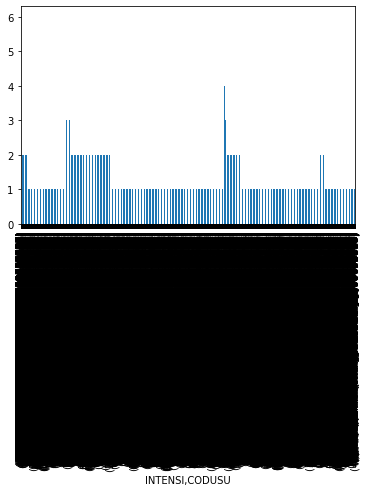

In [104]:
#Hace cuánto trabajan en la ocupación principal
print(eph.PP07A.unique())
eph.PP07A.value_counts(dropna=False, normalize=True)

[ 5. nan  2.  0.  6.  4.  3.  9.  1.]


NaN    0.592787
6.0    0.150365
0.0    0.141563
5.0    0.073930
2.0    0.012529
4.0    0.011522
3.0    0.009637
1.0    0.007003
9.0    0.000664
Name: PP07A, dtype: float64

In [106]:
#Deciles de ingreso total
print(eph.DECINDR.unique())
eph.DECINDR.value_counts(dropna=False, normalize=True)

[ 7  4 12  2  0  3  1  5  6  9 10  8 13]


0     0.388902
12    0.081554
3     0.065277
2     0.063414
5     0.056839
6     0.056582
4     0.056197
7     0.051121
1     0.050264
8     0.045510
9     0.044482
10    0.038314
13    0.001542
Name: DECINDR, dtype: float64

In [108]:
#Deciles de ingreso familiar
print(eph.DECIFR.unique())
eph.DECIFR.value_counts(dropna=False, normalize=True)

[ 4.  2. 12.  1.  9.  8.  5. 10.  6.  7.  3.  0. nan]


12.0    0.180734
7.0     0.099308
4.0     0.092326
3.0     0.085944
5.0     0.085216
6.0     0.084167
8.0     0.083524
9.0     0.082346
2.0     0.076521
10.0    0.066670
1.0     0.059923
0.0     0.003277
NaN     0.000043
Name: DECIFR, dtype: float64

In [109]:
#Descuento por jubilación
print(eph.PP07H.unique())
eph.PP07H.value_counts(dropna=False, normalize=True)

[ 1. nan  2.  0.]


NaN    0.592787
1.0    0.192727
0.0    0.114021
2.0    0.100465
Name: PP07H, dtype: float64

In [114]:
#Resúmenes estadísticos de variables de razón 
#CH06 = AÑOS
eph.CH06.describe()

count    46693.000000
mean        35.819952
std         22.439663
min         -1.000000
25%         17.000000
50%         33.000000
75%         53.000000
max        101.000000
Name: CH06, dtype: float64

In [117]:
#P47T = monto del ingreso total
eph.P47T.describe()

count     46619.000000
mean      19814.440786
std       31705.829005
min          -9.000000
25%           0.000000
50%        6000.000000
75%       30000.000000
max      819000.000000
Name: P47T, dtype: float64

In [119]:
#ITF= monto del ingreso familiar
eph.ITF.describe()

count     46691.000000
mean      61272.261742
std       59675.746294
min           0.000000
25%       20800.000000
50%       50000.000000
75%       84000.000000
max      819000.000000
Name: ITF, dtype: float64

De la lectura de los outputs correspondientes a esta sección se desprende una constatación central: la presencia de la misma cantidad de datos nulos (27679) en 5 columnas (PP03C, INTENSI, PP04D, PP07A y PP07H). Luego de realizar el value_counts de la columna del dataset ESTADO esta particularidad de la base cobra sentido: los datos no nulos de las 5 columnas corresponden a los ocupados (o valor 1 de la columna ESTADO). Es decir, son todas preguntas que solamente se le hicieron a las personas ocupadas. Como en la proxima sección se filtraran solamente los casos de subocupados (es decir, se trabajará solamente con ocupados subocupados) estos valores nulos no resultan un problema, serán descartados pues corresponden a casos que no interesan (personas no ocupadas).
Sí parece haber habido un error en la carga de datos en la variable edad. Al ver el mínimo de la columna y sus valores únicos aparece el -1 como un valor dispuesto. Habrá que solucionar este problema en la limpieza de datos. 
Cabe mencionar, también, el valor mínimo de P47T (monto total de ingresos indivudales). El -9 y el 9, 99 y 999 en el resto de las variables se corresponde con el "No sabe/no contesta". Algo similar sucede con el 12 y 13 que aparecen como valores únicos en DECIFR y DECINDR (variables que versan sobre los deciles de ingresos), implican que no se respondio a la pregunta o que no se hizo la entrevista individual, respectivamente.
Después no encuentro anomalías: todos los valores que adquieren las variables estan contemplados en el manual de la EPH y en la próxima sección  se procederá a etiquetarlos para que los datos puedan cobrar cierto sentido. 

# 3. Limpieza de datos 
Se realizará primero un recorte de la base y luego se etiquetaran los valores. Una vez recortada no deberían quedar valores nulos (por la correspondencia de estos con las personas no ocupadas).  
Limpieza de datos (llenar valores nulos -cómo- / poner nombre a valores/recategorizar)
 CODIGO
 CONCLUSIÓN --> NOS QUEDO ASI Y ASA EL DATA SET LIMPIO
 GUARDAR DATASETLIMPIO
 pd.save_csv("data/nombre_nuevo"). Así proxima vez ya puedo trabajar sobre este y no tengo que run all

In [58]:
#Recorte de la base (solamente subocupados del Gran Buenos Aires)
subocupados = eph[eph.INTENSI == 1]





In [59]:
subocupados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 9 to 46678
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      2293 non-null   object 
 1   REGION      2293 non-null   int64  
 2   AGLOMERADO  2293 non-null   int64  
 3   CH03        2293 non-null   int64  
 4   CH04        2293 non-null   int64  
 5   CH06        2293 non-null   int64  
 6   NIVEL_ED    2293 non-null   int64  
 7   CAT_OCUP    2293 non-null   int64  
 8   PP03C       2293 non-null   float64
 9   INTENSI     2293 non-null   float64
 10  PP07A       2293 non-null   float64
 11  P47T        2293 non-null   float64
 12  DECINDR     2293 non-null   int64  
 13  ITF         2293 non-null   float64
 14  DECIFR      2293 non-null   float64
 15  PP07H       2293 non-null   float64
 16  ESTADO      2293 non-null   int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 322.5+ KB


Como se estimo en las conclusiones de la exploración de los datos, no hay valores nulos en ninguna de las columnas. 

In [75]:
subocupados.to_excel('subocupados.xlsx')

# 4. Presentación de datos
Vamos a presetar nuestros datos para responder las preguntas definidas en el objetivo del análisis. Poner gráficos y poner qué nos van diciendo 

# 5 Conclusiones, qué estaba buscando, qué encontres 

# 6 Referencias
links a recursos que utilizamos y que nos sirvieron para análisis